In [69]:
import random
import numpy as np
import matplotlib.pyplot as plt

p={}
p[0] = 0.04
p[1] = 0.05
num = 10000
pp = np.array([ [1-p[0], p[0]], [p[1], 1-p[1]] ])
pD = {}
pD[0] = [1./6 for i in range(6)]
pD[1] = [1./10 for i in range(5)] + [0.5]
currD = 0



In [111]:
def heuristic(data, interval):
    col = []
    for i in range(len(data)):
        if count_six(data[max(i-interval,0):min(i+interval, len(data))])>interval//2 + interval/6: #4*interval/6:
            col.append('r')
        else:
            col.append('g')
            
    return col

def count_six(data):
    res = 0
    for i in data:
        if i == 6:
            res+=1
    return res

In [112]:
results = np.zeros(num)
color = list(range(num))
for i in range(num):
    currD = currD^1 if random.random() < p[currD] else currD
    results[i] = np.random.choice(6,1, p=pD[currD])[0]
    color[i] = 'r' if currD else 'g'
results+=1
color = np.array(color)
for i in range(6):
    print(i+1, np.sum(results==(i+1)) / num)
# plt.bar(range(num), results, color=color)

1 0.1346
2 0.1322
3 0.1402
4 0.1389
5 0.1366
6 0.3175


7:	0.8221
8:	0.8193


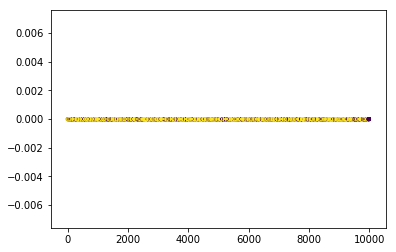

In [113]:
for i in range(7,9, 1):
    new_color = heuristic(results,i)
    new_color = np.array(new_color)
    score = np.sum(color==new_color)/len(results)
#     if score > 0.8:
    print(f'{i}:\t{score}')
#     plt.bar(range(num), results, color=new_color)
    plt.scatter(np.arange(num), np.zeros(num), c = color==new_color, marker='.')


In [114]:
# 0 -normalna kość
# 1 - oszukana
# na początku 0
# p[0] -> zmiana na nieuczciwą
data = results
alpha = np.zeros((2, num))
def count_alpha(T):
    for t in range(T):
        for j in range(2):
            if t==0:
                alpha[j,t] = j^1
            else:
                for i in range(2):
                    alpha[j,t] += alpha[i,t-1] * pp[i, j] * pD[i][int(data[t]-1)]
                alpha[j,t]*=50/9.
        if alpha[0,t] == 0:
            print(t)
            break
            
            
beta = np.zeros((2, num))
def count_beta(T):
    for t in range(T-1, -1, -1):
        for i in range(2):
            if t==T-1:
                beta[i,t] = 1
            else:
                for j in range(2):
                    beta[i,t] += beta[j,t+1] * pp[i,j] * pD[j][int(data[t]-1)] 
                beta[i,t]*=50/9
        if beta[0,t] == 0:
            print(t)
            break


count_alpha(len(data))
count_beta(len(data))
print(alpha[:,-1])
print(beta[:,1])


[5.58701388e+47 2.84512872e+47]
[1.07046109e+48 1.91559132e+47]


In [117]:
ab = alpha*beta
np.sum(ab, axis=0).shape

(10000,)

alfa:	0.7887


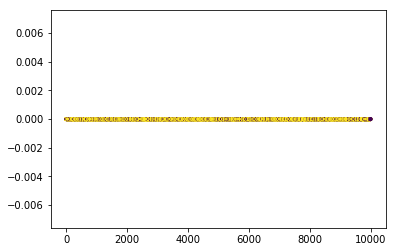

beta:	0.7782


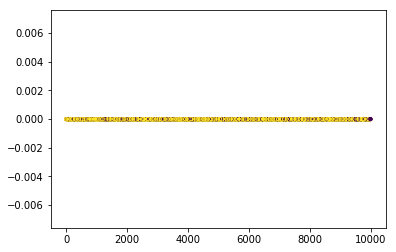

alpha * beta:	0.8298


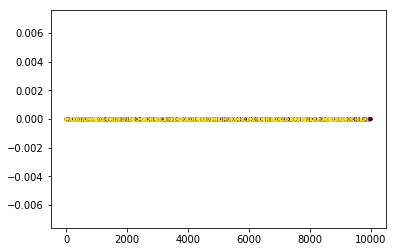

In [119]:
new_color_alpha = np.array(['g','r'])[(np.max(alpha, axis=0) != alpha[0, :]).astype(int)]
score = np.sum(color==new_color_alpha)/len(results)
print(f'alfa:\t{score}')
# plt.bar(range(num), results, color=new_color_alpha)
plt.scatter(np.arange(num), np.zeros(num), c = color==new_color_alpha, marker='.')
plt.show()

new_color_beta = np.array(['g','r'])[(np.max(beta, axis=0) != beta[0, :]).astype(int)]
score = np.sum(color==new_color_beta)/len(results)
print(f'beta:\t{score}')
# plt.bar(range(num), results, color=new_color_alpha)
plt.scatter(np.arange(num), np.zeros(num), c = color==new_color_beta, marker='.')
plt.show()

ab = alpha * beta / np.sum(ab, axis=0)
new_color_ab = np.array(['g','r'])[(np.max(ab, axis=0) != ab[0, :]).astype(int)]
score = np.sum(color==new_color_ab)/len(results)
print(f'alpha * beta:\t{score}')
# plt.bar(range(num), results, color=new_color_alpha)
plt.scatter(np.arange(num), np.zeros(num), c = color==new_color_ab, marker='.')
plt.show()